In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
original_df1 = pd.read_csv('../input/wind_dataset_imputed1.csv')
df1 = original_df1.drop('DATE', axis='columns')
df1.head()

original_df2 = pd.read_csv('../input/wind_dataset_imputed2.csv')
df2 = original_df2.drop('DATE', axis='columns')
df2.head()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [3]:
train_df1, test_df1 = train_test_split(df1, test_size=0.3, shuffle=False)

train_df2, test_df2 = train_test_split(df2, test_size=0.3, shuffle=False)

In [4]:
X1_train = train_df1.drop('WIND', axis='columns')
y1_train = train_df1['WIND']
X1_test = test_df1.drop('WIND', axis='columns')
y1_test = test_df1['WIND']

X2_train = train_df2.drop('WIND', axis='columns')
y2_train = train_df2['WIND']
X2_test = test_df2.drop('WIND', axis='columns')
y2_test = test_df2['WIND']

In [5]:
model = XGBRegressor()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

scores1 = cross_val_score(model, df1.drop('WIND', axis="columns"), df1['WIND'], scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print(scores1)
scores1 = absolute(scores1)
print('Mean MAE: %.3f (%.3f)' % (scores1.mean(), scores1.std()) )

scores2 = cross_val_score(model, df2.drop('WIND', axis="columns"), df2['WIND'], scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print(scores2)
scores2 = absolute(scores2)
print('Mean MAE: %.3f (%.3f)' % (scores2.mean(), scores2.std()) )

[-3.61964789 -3.53788572 -3.6981336  -3.71810172 -3.90066442 -3.69274037
 -3.47121633 -3.65826406 -3.74019336 -3.49263448 -3.71046641 -3.71356624
 -3.45153524 -3.67862321 -3.66136522 -3.56419824 -3.59629477 -3.68753277
 -3.61535757 -3.5930743  -3.73348879 -3.63514869 -3.5274706  -3.39492093
 -3.69129758 -3.71806233 -3.76098735 -3.6395198  -3.54911752 -3.51483348]
Mean MAE: 3.632 (0.106)
[-3.57857889 -3.65222547 -3.75536415 -3.83856915 -3.90758355 -3.71345155
 -3.53322546 -3.73652748 -3.62740586 -3.49074006 -3.69132992 -3.71687869
 -3.52243017 -3.7532905  -3.71060566 -3.68569267 -3.53546544 -3.83753945
 -3.6795853  -3.63127071 -3.68932548 -3.69843258 -3.55340689 -3.40244996
 -3.6995694  -3.77097162 -3.86399663 -3.77479935 -3.60918299 -3.5396958 ]
Mean MAE: 3.673 (0.117)


3.72


<AxesSubplot:xlabel='DATE'>

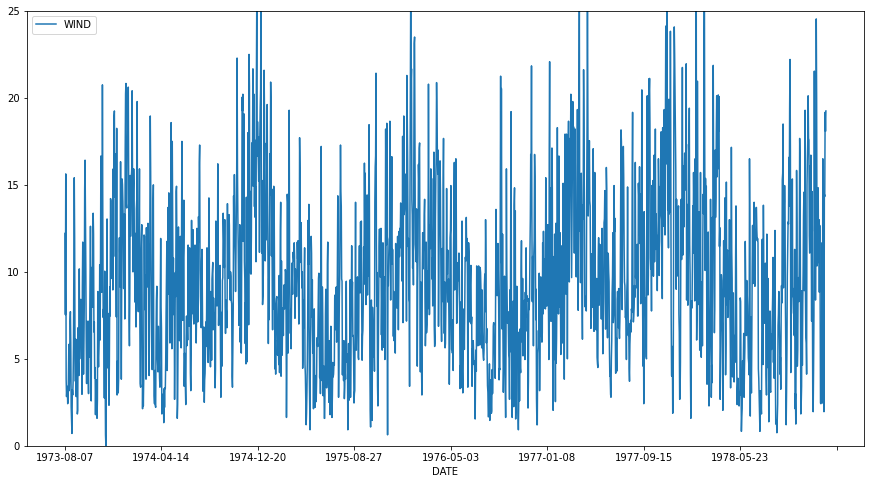

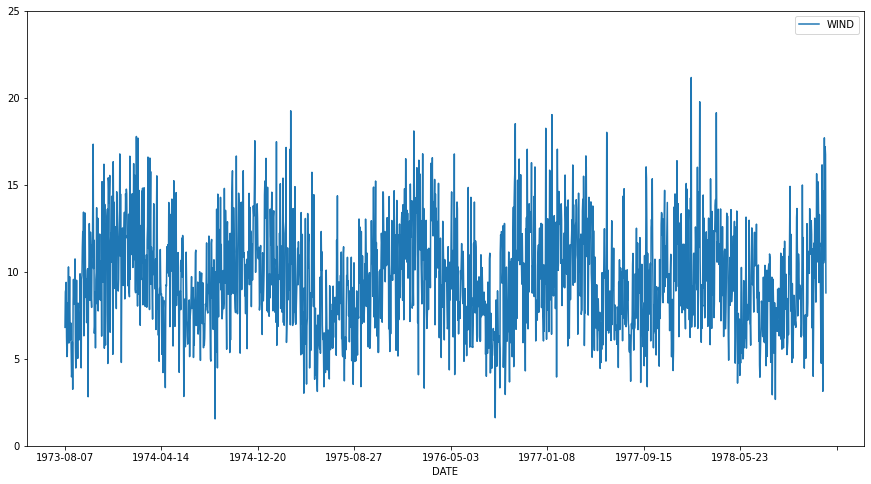

In [6]:
model.fit(X1_train, y1_train)

predicted_y1 = model.predict(X1_test)

print(round(mean_absolute_error(y1_test, predicted_y1), 2))

test_df1['DATE'] = original_df1['DATE']
test_df1 = test_df1.set_index('DATE')
test_df1.plot(y='WIND',figsize=(15,8), ylim=(0, 25))

predicted_y1_df1 = pd.DataFrame([list(x) for x in zip(test_df1.index.array, predicted_y1)], columns=['DATE', 'WIND'])
predicted_y1_df1 = predicted_y1_df1.set_index('DATE')
predicted_y1_df1.plot(y='WIND',figsize=(15,8), ylim=(0, 25))

3.72


<AxesSubplot:xlabel='DATE'>

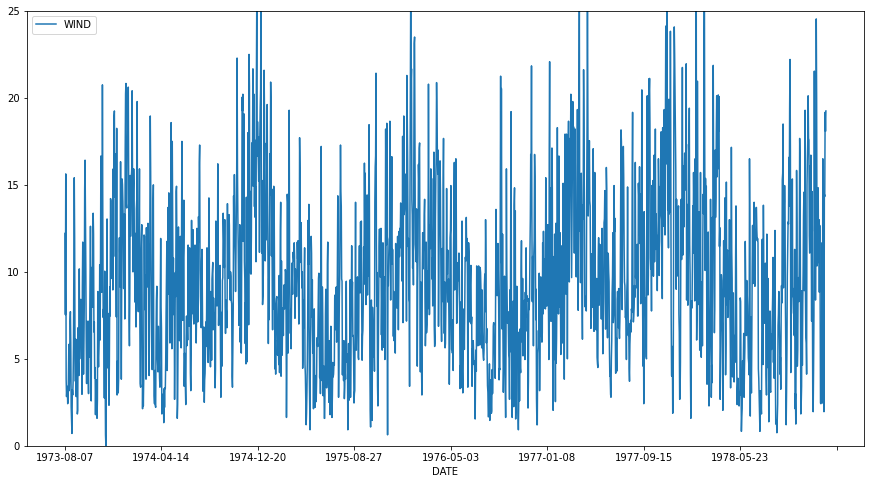

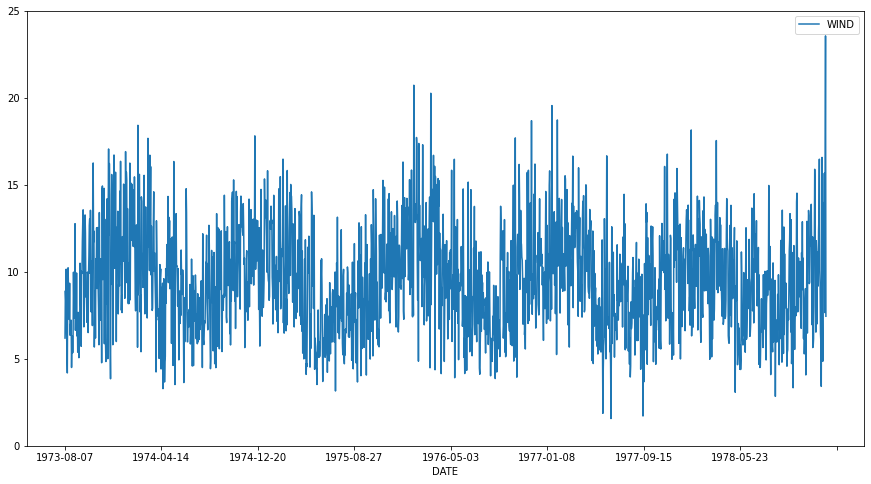

In [7]:
model.fit(X2_train, y2_train)

predicted_y2 = model.predict(X2_test)

print(round(mean_absolute_error(y1_test, predicted_y1), 2))

test_df2['DATE'] = original_df2['DATE']
test_df2 = test_df2.set_index('DATE')
test_df2.plot(y='WIND',figsize=(15,8), ylim=(0,25))

predicted_y2_df2 = pd.DataFrame([list(x) for x in zip(test_df2.index.array, predicted_y2)], columns=['DATE', 'WIND'])
predicted_y2_df2 = predicted_y2_df2.set_index('DATE')
predicted_y2_df2.plot(y='WIND',figsize=(15,8), ylim=(0,25))